In [ ]:
!pip install pycaret

In [ ]:
from pycaret.clustering import *
import pandas as pd

# Загрузка данных
df = pd.read_csv('/content/hcvdat0.csv')

# Настройка эксперимента
s = setup(df, normalize=True)

,Description,Value
0,Session id,8966
1,Original data shape,"(615, 14)"
2,Transformed data shape,"(615, 18)"
3,Numeric features,12
4,Categorical features,2
5,Rows with missing values,4.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4942,104.5597,1.3809,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=8966)


In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

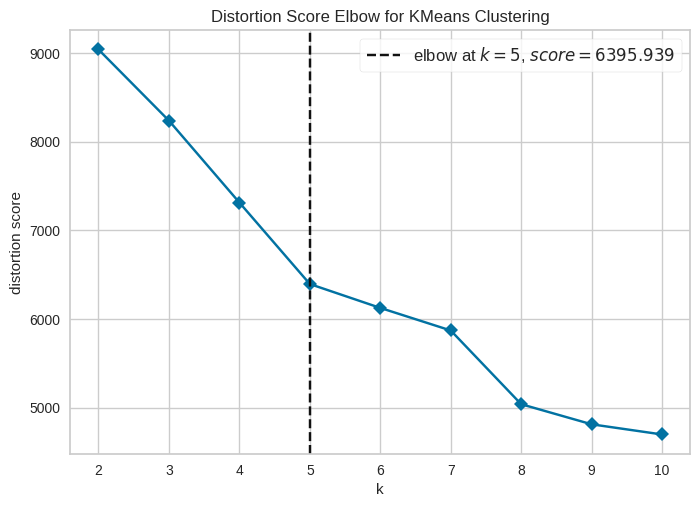

In [ ]:
plot_model(kmeans, plot = 'elbow')

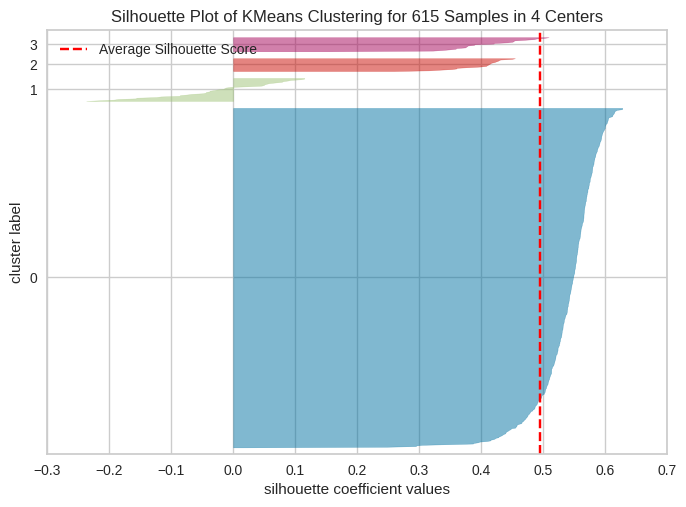

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
result = assign_model(kmeans)
result.head(600)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Cluster
0,1,0=Blood Donor,32,m,38.500000,52.500000,7.700000,22.100000,7.5,6.93,3.23,106.000000,12.100000,69.000000,Cluster 0
1,2,0=Blood Donor,32,m,38.500000,70.300003,18.000000,24.700001,3.9,11.17,4.80,74.000000,15.600000,76.500000,Cluster 0
2,3,0=Blood Donor,32,m,46.900002,74.699997,36.200001,52.599998,6.1,8.84,5.20,86.000000,33.200001,79.300003,Cluster 0
3,4,0=Blood Donor,32,m,43.200001,52.000000,30.600000,22.600000,18.9,7.33,4.74,80.000000,33.799999,75.699997,Cluster 0
4,5,0=Blood Donor,32,m,39.200001,74.099998,32.599998,24.799999,9.6,9.15,4.32,76.000000,29.900000,68.699997,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,3=Cirrhosis,56,m,27.000000,81.099998,17.000000,319.799988,37.0,1.42,3.54,66.900002,93.699997,65.300003,Cluster 1
596,597,3=Cirrhosis,56,m,23.000000,105.599998,5.100000,123.000000,43.0,1.80,2.40,62.700001,35.900002,62.799999,Cluster 1
597,598,3=Cirrhosis,56,m,30.000000,40.400002,0.900000,80.300003,119.0,1.88,1.43,79.300003,17.600000,54.200001,Cluster 1
598,599,3=Cirrhosis,58,m,31.000000,143.100006,7.000000,181.800003,58.0,3.29,3.92,66.400002,273.700012,78.099998,Cluster 1


In [ ]:
predictions = predict_model(kmeans, data = df)
predictions.head()


,Unnamed: 0,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Cluster
0,-1.729237,0.392232,-0.107299,-0.201517,-0.188025,-0.226455,-1.533616,0.794544,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.497070,-0.502286,-0.564372,Cluster 0
1,-1.723604,0.392232,-0.107299,-0.201517,-0.188025,-0.226455,-1.533616,0.794544,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.146590,-0.438203,0.826102,Cluster 0
2,-1.717971,0.392232,-0.107299,-0.201517,-0.188025,-0.226455,-1.533616,0.794544,0.914850,0.250402,0.304747,0.538767,-0.269457,0.291926,-0.149747,0.094783,-0.115957,1.345212,Cluster 0
3,-1.712339,0.392232,-0.107299,-0.201517,-0.188025,-0.226455,-1.533616,0.794544,0.273738,-0.635517,0.084520,-0.368571,0.381706,-0.393234,-0.559528,-0.025903,-0.104971,0.677784,Cluster 0
4,-1.706706,0.392232,-0.107299,-0.201517,-0.188025,-0.226455,-1.533616,0.794544,-0.419356,0.226986,0.163172,-0.302033,-0.091404,0.432588,-0.933675,-0.106361,-0.176378,-0.619991,Cluster 0


In [ ]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'Age', 'ALB', 'ALP',
                                              'ALT', 'AST', 'BIL', 'CHE', 'CHOL',
                                              'CREA', 'GGT', 'PROT'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Category', 'Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  T...
                                                                mapping=[{'col': 'Sex',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': f      0
 m      1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
  